In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

C:\Users\USER\AppData\Local\Temp\ipykernel_30088\1771102282.py:10: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yt = pd.Series(y, index=pd.date_range(start='1-1-2023', periods=len(y), freq='Y'))


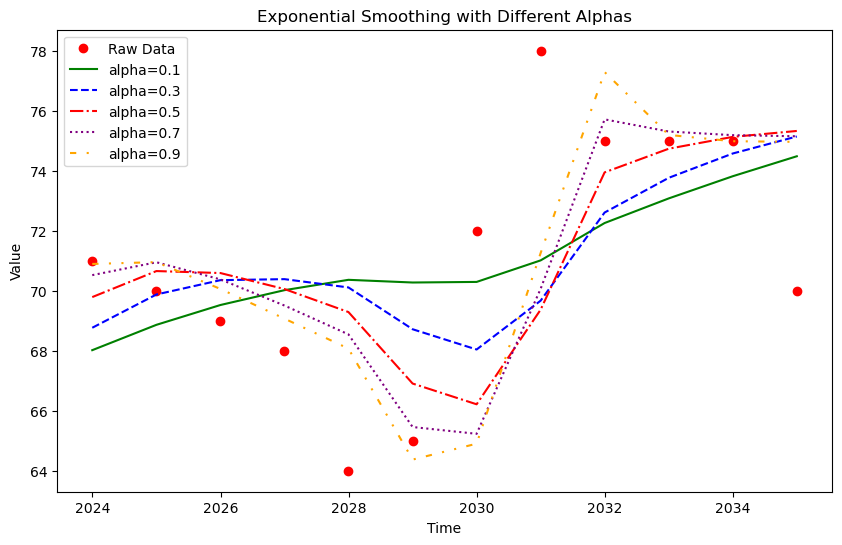

In [2]:
# Data Preparation
y = [71, 70, 69, 68, 64, 65, 72, 78, 75, 75, 75, 70]

# Creating a Time Series Object 
yt = pd.Series(y, index=pd.date_range(start='1-1-2023', periods=len(y), freq='Y'))

# Fitting ETS Models with Different Alphas
alphas = [0.1, 0.3, 0.5, 0.7, 0.9]
fitted_values = []  
line_types = ['-', '--', '-.', ':', (0, (3, 5, 1, 5, 1, 5))]
colors = ['green', 'blue', 'red', 'purple', 'orange']

for alpha in alphas:
    fit = ExponentialSmoothing(yt, trend='add', seasonal=None).fit(smoothing_level=alpha)
    fitted_values.append(fit.fittedvalues)

# Plotting the Results
plt.figure(figsize=(10, 6))
plt.plot(yt, marker='o', linestyle='', color='red', label='Raw Data')

for i, values in enumerate(fitted_values):
    plt.plot(values, linestyle=line_types[i], color=colors[i], label=f'alpha={alphas[i]}')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Exponential Smoothing with Different Alphas')
plt.legend()
plt.show()

In [3]:
# Double Exponential Smoothing (Holt's Linear Trend)
s = [7, 6, 5, 4, 8, 9, 10, 11, 10, 7]
s1 = pd.Series(s, index=pd.date_range(start='1-1-2023', periods=len(s), freq='Y'))  # Time series with annual frequency

fit_double = ExponentialSmoothing(s1, trend='add', seasonal=None).fit()
pred_double = fit_double.forecast(4)
print("Double Exponential Smoothing Forecast:", pred_double)

Double Exponential Smoothing Forecast: 2033-12-31    10.266767
2034-12-31    10.733444
2035-12-31    11.200121
2036-12-31    11.666797
Freq: YE-DEC, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_30088\3818957933.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  s1 = pd.Series(s, index=pd.date_range(start='1-1-2023', periods=len(s), freq='Y'))  # Time series with annual frequency


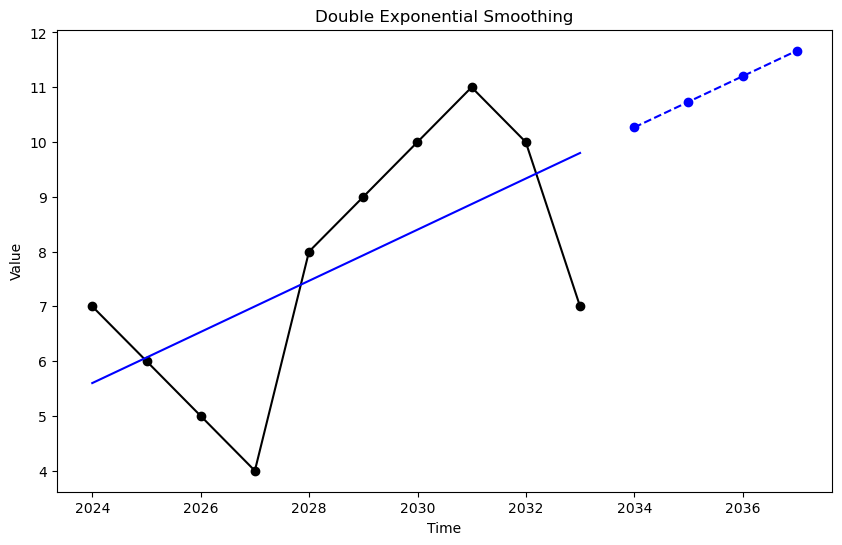

In [4]:
# Plotting the double exponential smoothing results.
plt.figure(figsize=(10, 6))
plt.plot(s1, marker='o', color='black')
plt.plot(fit_double.fittedvalues, color='blue')
plt.plot(pred_double, marker='o', linestyle='dashed', color='blue')
plt.title('Double Exponential Smoothing')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

Index(['Month', 'Passengers'], dtype='object')
Triple Exponential Smoothing Forecast: 144    451.577922
145    427.258353
146    464.699088
147    500.103959
148    508.661708
dtype: float64


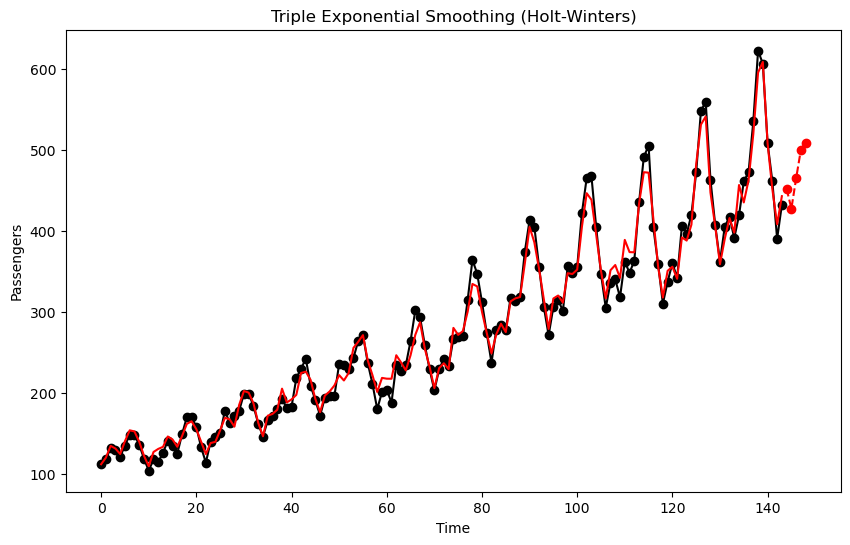

In [6]:
# Triple Exponential Smoothing (Holt-Winters)
air_passengers_data = pd.read_csv('AirPassengers.csv')  # Don't assume the column name has '#'

# Check the actual column names
print(air_passengers_data.columns) 

# Adjust this based on the actual column name
fit_triple = ExponentialSmoothing(air_passengers_data['Passengers'], trend='add', seasonal='add', seasonal_periods=12).fit()  
pred_triple = fit_triple.forecast(5)
print("Triple Exponential Smoothing Forecast:", pred_triple)

# Plotting the triple exponential smoothing results.
plt.figure(figsize=(10, 6))
plt.plot(air_passengers_data['Passengers'], marker='o', color='black')
plt.plot(fit_triple.fittedvalues, color='red')
plt.plot(pred_triple, marker='o', linestyle='dashed', color='red')
plt.title('Triple Exponential Smoothing (Holt-Winters)')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.show()
